# Titanic Survival Analysis

Obiettivo: Predire la sopravvivenza dei passeggeri del Titanic tramite Machine Learning.  
Dataset: Titanic - Machine Learning from Disaster (Kaggle)

---

**Step:**
1. Setup ambiente e librerie
2. Caricamento e analisi dataset
3. Preprocessing
4. Modellazione e valutazione
5. Conclusioni

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica dataset
data = pd.read_csv('../data/train.csv')

# Anteprima dati
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


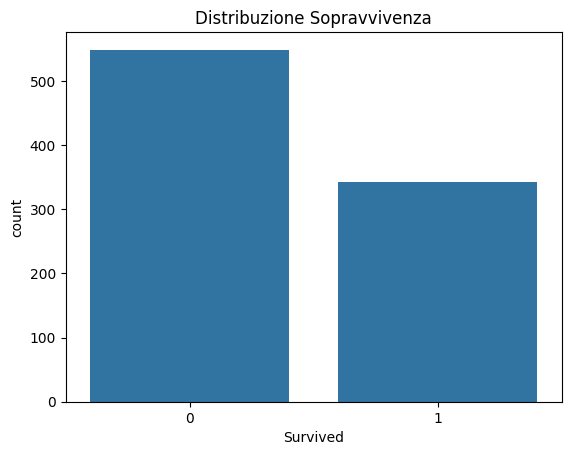

In [2]:
# Istogramma distribuzione target Survived
sns.countplot(x='Survived', data=data)
plt.title('Distribuzione Sopravvivenza')
plt.show()

Valori mancanti per colonna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


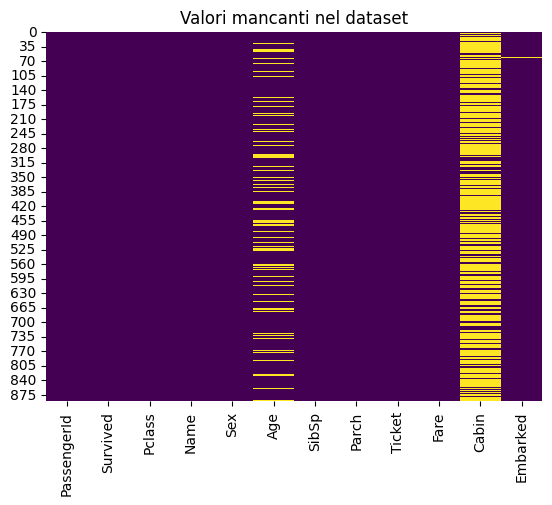

In [3]:
# Valori mancanti per colonna
missing = data.isnull().sum()
print("Valori mancanti per colonna:")
print(missing)

sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Valori mancanti nel dataset")
plt.show()

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


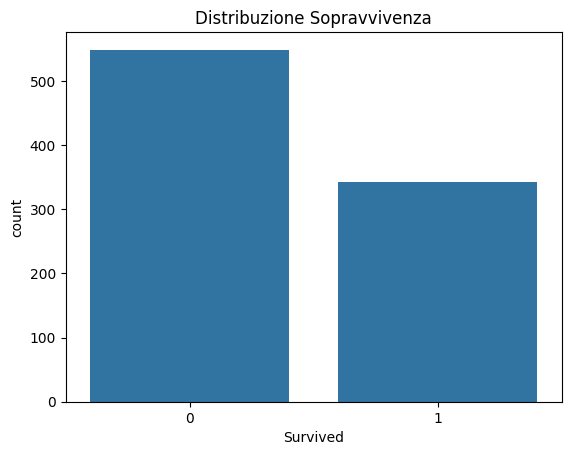

In [4]:
# Distribuzione e percentuale target Survived
print(data['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived', data=data)
plt.title("Distribuzione Sopravvivenza")
plt.show()

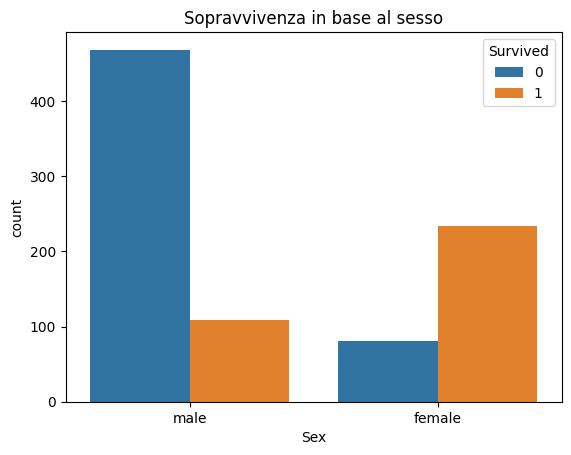

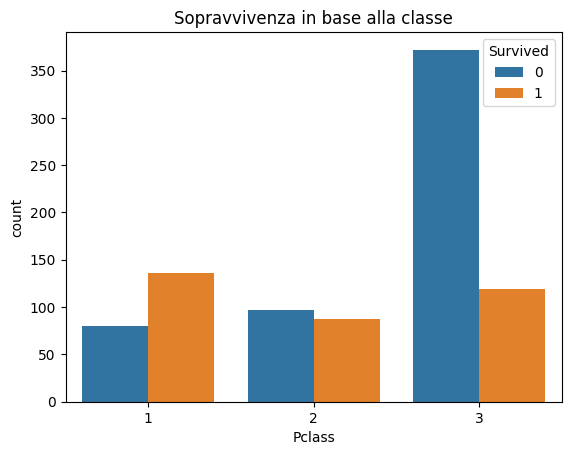

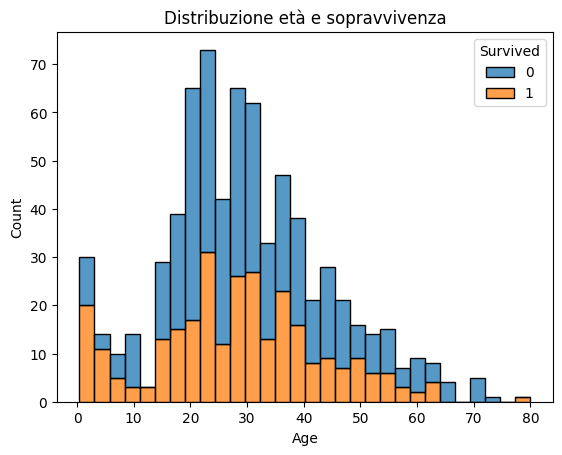

In [5]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Sopravvivenza in base al sesso')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Sopravvivenza in base alla classe')
plt.show()

sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Distribuzione età e sopravvivenza")
plt.show()

In [6]:
# Mostra di nuovo i valori mancanti (già fatto sopra per chiarezza)
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Sostituisci 'Age' mancante con media
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Sostituisci 'Embarked' mancante con la moda
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Opzionale: Droppa la colonna 'Cabin' (troppi missing)
data.drop('Cabin', axis=1, inplace=True)

print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
# Codifica 'Sex' e 'Embarked' come numeri
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features da usare per il modello (escludi colonne non predittive)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

X = data[features]
y = data['Survived']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Valutazione
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

